In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## 1. Load Raw Data

In [2]:
# Load the dataset
data_path = '../data/data.csv'
df_raw = pd.read_csv(data_path)

print(f"Dataset shape: {df_raw.shape}")
print(f"\nColumns: {list(df_raw.columns)}")
print(f"\nFirst 5 rows:")
df_raw.head()

Dataset shape: (23784, 9)

Columns: ['Country', 'Indicator', 'Source', 'Unit', 'Currency', 'Frequency', 'Country Code', 'Time', 'Amount']

First 5 rows:


,Country,Indicator,Source,Unit,Currency,Frequency,Country Code,Time,Amount
0,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2007-01-01,-56213
1,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2008-01-01,-67563
2,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2009-01-01,-72379
3,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2010-01-01,-98886
4,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2011-01-01,-134138


In [3]:
# Display data types and info
print("Data Types:")
print(df_raw.dtypes)
print("\n" + "="*60)
print("Dataset Info:")
df_raw.info()

Data Types:
Country         object
Indicator       object
Source          object
Unit            object
Currency        object
Frequency       object
Country Code    object
Time            object
Amount          object
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23784 entries, 0 to 23783
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       23784 non-null  object
 1   Indicator     23784 non-null  object
 2   Source        23784 non-null  object
 3   Unit          23762 non-null  object
 4   Currency      13281 non-null  object
 5   Frequency     23784 non-null  object
 6   Country Code  23784 non-null  object
 7   Time          23780 non-null  object
 8   Amount        23725 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


## 2. Data Cleaning

In [4]:
# Create a copy for cleaning
df = df_raw.copy()

# Convert Time column to datetime
df['Time'] = pd.to_datetime(df['Time'])
df['Year'] = df['Time'].dt.year

print(f"Time range: {df['Year'].min()} to {df['Year'].max()}")
print(f"\nUnique countries: {df['Country'].nunique()}")
print(df['Country'].unique())

Time range: 1960.0 to 2025.0

Unique countries: 14
['Egypt' 'Ethiopia' 'Ghana' 'Ivory Coast' 'Nigeria' 'South Africa'
 'Tanzania' 'Togo' 'Senegal' 'Kenya' 'Rwanda' 'Algeria' 'Angola'
 'Botswana']


In [5]:
# Clean Amount column - convert to numeric
# First, check what type of values we have
print("Sample Amount values before cleaning:")
print(df['Amount'].head(20))
print(f"\nAmount data type: {df['Amount'].dtype}")

# Convert to numeric, coercing errors to NaN
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

print(f"\n✅ Amount column converted to numeric")
print(f"Missing values in Amount: {df['Amount'].isna().sum()} ({df['Amount'].isna().sum()/len(df)*100:.2f}%)")

Sample Amount values before cleaning:
0      -56213
1      -67563
2      -72379
3      -98886
4     -134138
5     -165689
6     -246853
7     -254715
8     -284314
9         NaN
10    -366401
11    -425385
12    -423019
13    -408509
14    -459449
15    -477486
16    -580182
17       -962
18     -11097
19     -29076
Name: Amount, dtype: object

Amount data type: object

✅ Amount column converted to numeric
Missing values in Amount: 65 (0.27%)


In [6]:
# Standardize indicator names (remove trailing spaces and duplicates)
df['Indicator'] = df['Indicator'].str.strip()

# Consolidate duplicate indicators
indicator_mapping = {
    'GDP per capita': 'GDP per Capita',
    'GDP per Capita ': 'GDP per Capita',
    'Inflation Rate ': 'Inflation Rate',
    'Food Inflation ': 'Food Inflation',
    'Food Inflation YoY': 'Food Inflation'
}

df['Indicator'] = df['Indicator'].replace(indicator_mapping)

print("Unique indicators after standardization:")
print(df['Indicator'].value_counts())

Unique indicators after standardization:
Indicator
Inflation Rate                3003
Consumer Price Index (CPI)    2850
Interest Rate                 2652
Revenue                       1752
Exports                       1611
Imports                       1590
Budget Deficit/Surplus        1417
Government Debt               1121
Food Inflation                1099
Nominal GDP                   1008
Real GDP                      1001
GDP Growth Rate                962
Expenditure                    961
Tax Revenue                    762
Capital Expenditure            663
Value Added Tax (VAT)          376
Population                     323
Unemployment Rate              218
Defence Expenditure            140
Labour Force                   132
GDP per Capita                  81
Health Expenditure              43
Education Expenditure           19
Name: count, dtype: int64


## 3. Missing Value Analysis

In [7]:
# Analyze missing values
print("Missing values by column:")
missing_summary = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percent': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

print(missing_summary[missing_summary['Missing_Count'] > 0])

Missing values by column:
          Missing_Count  Missing_Percent
Currency          10503            44.16
Amount               65             0.27
Unit                 22             0.09
Time                  4             0.02
Year                  4             0.02


In [8]:
# Check missing values by indicator
missing_by_indicator = df.groupby('Indicator')['Amount'].apply(
    lambda x: (x.isna().sum(), len(x), x.isna().sum()/len(x)*100)
).apply(pd.Series)

missing_by_indicator.columns = ['Missing', 'Total', 'Percent_Missing']
missing_by_indicator = missing_by_indicator.sort_values('Percent_Missing', ascending=False)

print("\nMissing values by indicator:")
print(missing_by_indicator[missing_by_indicator['Missing'] > 0])


Missing values by indicator:
                            Missing   Total  Percent_Missing
Indicator                                                   
Defence Expenditure             5.0   140.0         3.571429
Food Inflation                 13.0  1099.0         1.182894
Tax Revenue                     4.0   762.0         0.524934
Expenditure                     5.0   961.0         0.520291
Inflation Rate                 11.0  3003.0         0.366300
Budget Deficit/Surplus          5.0  1417.0         0.352858
Revenue                         5.0  1752.0         0.285388
Value Added Tax (VAT)           1.0   376.0         0.265957
Consumer Price Index (CPI)      6.0  2850.0         0.210526
Imports                         3.0  1590.0         0.188679
Exports                         3.0  1611.0         0.186220
Interest Rate                   4.0  2652.0         0.150830


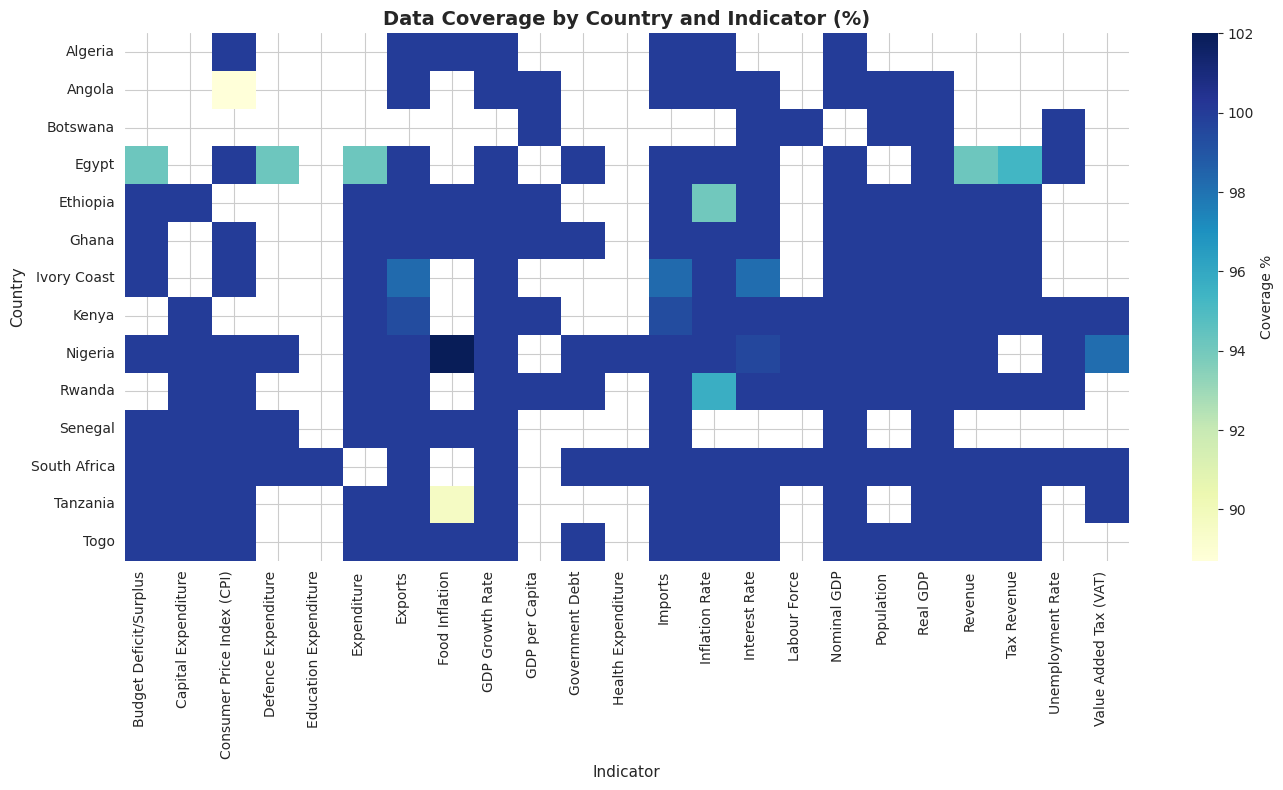


✅ Data coverage visualization complete


In [9]:
# Visualize data coverage by country and indicator
coverage = df.groupby(['Country', 'Indicator']).agg({
    'Amount': lambda x: x.notna().sum(),
    'Year': 'count'
}).reset_index()

coverage['Coverage_Percent'] = (coverage['Amount'] / coverage['Year'] * 100).round(1)

plt.figure(figsize=(14, 8))
pivot_coverage = coverage.pivot(index='Country', columns='Indicator', values='Coverage_Percent')
sns.heatmap(pivot_coverage, annot=False, cmap='YlGnBu', cbar_kws={'label': 'Coverage %'})
plt.title('Data Coverage by Country and Indicator (%)', fontsize=14, fontweight='bold')
plt.xlabel('Indicator', fontsize=11)
plt.ylabel('Country', fontsize=11)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

print("\n✅ Data coverage visualization complete")

## 4. Create Panel Dataset (Wide Format)

In [10]:
# Pivot data to wide format: rows = (Country, Year), columns = Indicators
df_panel = df.pivot_table(
    index=['Country', 'Country Code', 'Year'],
    columns='Indicator',
    values='Amount',
    aggfunc='first'  # In case of duplicates, take first value
).reset_index()

print(f"Panel dataset shape: {df_panel.shape}")
print(f"\nCountries: {df_panel['Country'].nunique()}")
print(f"Years: {df_panel['Year'].min()} to {df_panel['Year'].max()}")
print(f"Total observations: {len(df_panel)}")

df_panel.head(10)

Panel dataset shape: (623, 26)

Countries: 14
Years: 1960.0 to 2025.0
Total observations: 623


Indicator,Country,Country Code,Year,Budget Deficit/Surplus,Capital Expenditure,Consumer Price Index (CPI),Defence Expenditure,Education Expenditure,Expenditure,Exports,...,Inflation Rate,Interest Rate,Labour Force,Nominal GDP,Population,Real GDP,Revenue,Tax Revenue,Unemployment Rate,Value Added Tax (VAT)
0,Algeria,DZA,1977.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,DZA,1978.0,NaN,NaN,NaN,NaN,NaN,NaN,6.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,DZA,1979.0,NaN,NaN,NaN,NaN,NaN,NaN,9.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,DZA,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,13.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,DZA,1981.0,NaN,NaN,NaN,NaN,NaN,NaN,14.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,DZA,1982.0,NaN,NaN,NaN,NaN,NaN,NaN,13.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Algeria,DZA,1983.0,NaN,NaN,NaN,NaN,NaN,NaN,12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Algeria,DZA,1984.0,NaN,NaN,NaN,NaN,NaN,NaN,12.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Algeria,DZA,1985.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Algeria,DZA,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Rename columns to snake_case for easier access
df_panel.columns = [col.lower().replace(' ', '_').replace('/', '_').replace('(', '').replace(')', '') for col in df_panel.columns]

print("Column names after standardization:")
print(list(df_panel.columns))

Column names after standardization:
['country', 'country_code', 'year', 'budget_deficit_surplus', 'capital_expenditure', 'consumer_price_index_cpi', 'defence_expenditure', 'education_expenditure', 'expenditure', 'exports', 'food_inflation', 'gdp_growth_rate', 'gdp_per_capita', 'government_debt', 'health_expenditure', 'imports', 'inflation_rate', 'interest_rate', 'labour_force', 'nominal_gdp', 'population', 'real_gdp', 'revenue', 'tax_revenue', 'unemployment_rate', 'value_added_tax_vat']


In [12]:
# Check for duplicate indicator columns and consolidate
# Check column names
print("Columns with potential duplicates:")
cols = list(df_panel.columns)
for col in cols:
    if 'gdp_per_capita' in col:
        print(f"  - {col}")

Columns with potential duplicates:
  - gdp_per_capita


## 5. Data Quality Summary

Data completeness by country (%):

Kenya               :  62.0%
Togo                :  60.9%
Ethiopia            :  60.9%
Nigeria             :  59.0%
South Africa        :  57.6%
Ivory Coast         :  57.0%
Rwanda              :  55.2%
Tanzania            :  50.8%
Egypt               :  48.0%
Senegal             :  36.3%
Angola              :  36.2%
Ghana               :  35.6%
Algeria             :  31.6%
Botswana            :  20.0%


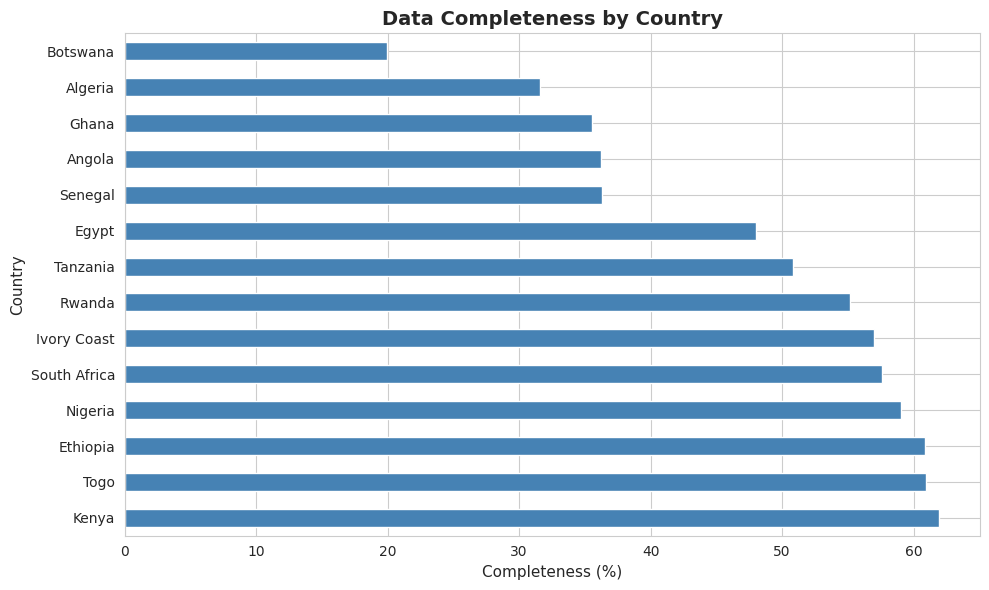

In [13]:
# Calculate completeness for each country
country_completeness = df_panel.groupby('country').apply(
    lambda x: x.notna().sum().sum() / (len(x) * (len(x.columns) - 3)) * 100
).sort_values(ascending=False)

print("Data completeness by country (%):\n")
for country, completeness in country_completeness.items():
    print(f"{country:20s}: {completeness:5.1f}%")

# Visualize
plt.figure(figsize=(10, 6))
country_completeness.plot(kind='barh', color='steelblue')
plt.xlabel('Completeness (%)', fontsize=11)
plt.ylabel('Country', fontsize=11)
plt.title('Data Completeness by Country', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [14]:
# Identify countries with best coverage for focus analysis
top_coverage_countries = country_completeness.head(6).index.tolist()

print("\n🎯 Recommended focus countries (best data coverage):")
for i, country in enumerate(top_coverage_countries, 1):
    print(f"{i}. {country} ({country_completeness[country]:.1f}% complete)")


🎯 Recommended focus countries (best data coverage):
1. Kenya (62.0% complete)
2. Togo (60.9% complete)
3. Ethiopia (60.9% complete)
4. Nigeria (59.0% complete)
5. South Africa (57.6% complete)
6. Ivory Coast (57.0% complete)


## 6. Export Cleaned Data

In [15]:
# Export cleaned panel dataset
output_path = '../data/cleaned_panel_data.csv'
df_panel.to_csv(output_path, index=False)

print(f"✅ Cleaned panel data saved to: {output_path}")
print(f"   Shape: {df_panel.shape}")
print(f"   Size: {Path(output_path).stat().st_size / 1024:.1f} KB")

✅ Cleaned panel data saved to: ../data/cleaned_panel_data.csv
   Shape: (623, 26)
   Size: 55.8 KB


In [16]:
# Also save the long-format cleaned data
output_long_path = '../data/cleaned_long_data.csv'
df.to_csv(output_long_path, index=False)

print(f"✅ Cleaned long-format data saved to: {output_long_path}")
print(f"   Shape: {df.shape}")

✅ Cleaned long-format data saved to: ../data/cleaned_long_data.csv
   Shape: (23784, 10)


## 7. Summary Statistics

In [17]:
# Display summary statistics for key indicators
key_indicators = [
    'government_debt', 'budget_deficit_surplus', 'nominal_gdp', 'real_gdp',
    'gdp_growth_rate', 'inflation_rate', 'revenue', 'expenditure'
]

available_indicators = [col for col in key_indicators if col in df_panel.columns]

if available_indicators:
    print("Summary statistics for key indicators:\n")
    print(df_panel[available_indicators].describe().round(2))
else:
    print("Key indicators not found with expected names. Available columns:")
    print([col for col in df_panel.columns if col not in ['country', 'country_code', 'year']])

Summary statistics for key indicators:

       government_debt  budget_deficit_surplus   nominal_gdp      real_gdp  \
count     1.760000e+02                  248.00  4.060000e+02  3.950000e+02   
mean      2.242555e+06              -263682.64  7.126328e+06  5.446527e+06   
std       1.113979e+07              1296058.55  2.302568e+07  1.994354e+07   
min       1.100000e+01            -13501819.00  2.250000e+01  6.252100e+02   
25%       8.367100e+02                -6348.25  1.371320e+03  3.314130e+03   
50%       1.519800e+04                 -345.45  1.219347e+04  1.717008e+04   
75%       8.269128e+04                  -13.28  2.545386e+06  1.293160e+06   
max       1.216709e+08                 3718.00  1.887881e+08  1.483998e+08   

       gdp_growth_rate  inflation_rate     revenue  expenditure  
count           349.00          272.00      296.00       239.00  
mean              4.41            8.42   307961.28    652899.05  
std               3.72            9.11   887630.33   219029

## ✅ Data Preparation Complete!

### Next Steps:
1. **Exploratory Data Analysis** (`01_eda.ipynb`)
2. **Feature Engineering** (`02_feature_engineering.ipynb`)
3. **ML Model Development** (`03_ml_debt_crisis.ipynb`)

### Outputs:
- `cleaned_panel_data.csv` - Wide format (country-year panel)
- `cleaned_long_data.csv` - Long format (one row per observation)

### Key Findings:
- Dataset covers 14 African countries from 1960-2025
- 27 unique indicators after standardization
- Top 6 countries recommended for detailed analysis based on data completeness